In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [4]:
inter16 = pd.read_excel('/Users/justin/Desktop/soda data/inter16.xlsx')
inter16.head()

,State,Households with computer (including smartphone) Percent,Households with internet access. Percent,Poverty(2-year average),3-year average
0,United States ................................,89.269535,81.864155,13.1,13.7
1,Alabama .........................................,83.909992,75.284830,16.3,16.8
2,Alaska ..........................................,94.433488,86.695671,10.9,11.2
3,Arizona .........................................,91.044885,83.804423,16.6,18.2
4,Arkansas ........................................,84.479373,71.134348,16.1,16.8


In [5]:
voter16= pd.read_excel('/Users/justin/Desktop/soda data/voter16.xlsx')
voter16.head()

,State,Percent registered\n(Total),Percent voted\n(Total),Turnout,Label (>mean 0.872)
0,UNITED STATES,64.1935,56.0226,0.872715,1
1,ALABAMA,67.9617,56.3712,0.829455,0
2,ALASKA,69.0653,59.4061,0.860144,1
3,ARIZONA,60.5332,53.2880,0.880310,1
4,ARKANSAS,65.6858,56.0106,0.852705,0


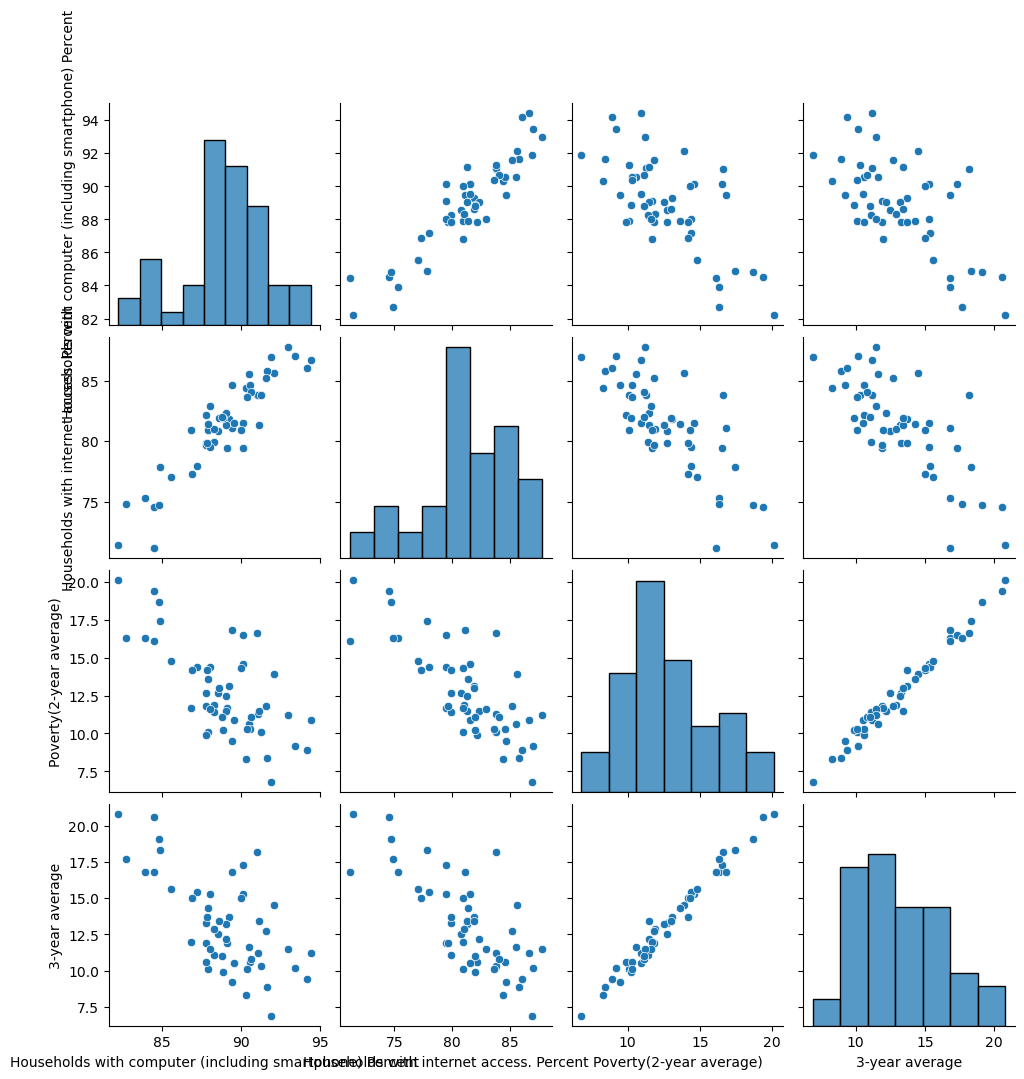

In [7]:
sns.pairplot(inter16)

In [15]:
y = voter16['Label (>mean 0.872)']
X = inter16.iloc[:,1:]
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [16]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -5.36157169490192
Coefficients: 
 [ 0.03409492  0.03718637 -0.14399199  0.12285705]


In [27]:
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Label (>mean 0.872)   R-squared:                       0.290
Model:                             OLS   Adj. R-squared:                  0.229
Method:                  Least Squares   F-statistic:                     4.789
Date:                 Wed, 01 Mar 2023   Prob (F-statistic):            0.00253
Time:                         00:00:51   Log-Likelihood:                -28.814
No. Observations:                   52   AIC:                             67.63
Df Residuals:                       47   BIC:                             77.38
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [29]:
print('R2 score:', model.rsquared)

R2 score: 0.2895710847583788


In [30]:
print('F-statistic:', model.fvalue)
print('Probability of observing value at least as high as F-statistic:', model.f_pvalue)


F-statistic: 4.78930428212336
Probability of observing value at least as high as F-statistic: 0.002529899528379241


In [31]:
print(model.pvalues)

const                                                      0.089213
Households with computer (including smartphone) Percent    0.561341
Households with internet access. Percent                   0.445758
Poverty(2-year average)                                    0.330913
3-year average                                             0.349956
dtype: float64
